<a href="https://colab.research.google.com/github/YvetteKal/data-generator-gan/blob/main/test_wCGAN_GP_CGAN_omicron__status_lfc_1_cosine_pca_all_no_smote__ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Concatenate
from tensorflow import keras
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(12)


# Load the original data
data = pd.read_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/numerized_status_omicron_dataset_lfc_1_DEGs_transposed.csv')

# Assign the last column to y_train


# Filter x_train and y_train for class label 1
#class_label = 1


In [3]:
data.head()

,ENSG00000186827_TNFRSF4,ENSG00000186891_TNFRSF18,ENSG00000160072_ATAD3B,ENSG00000225972_MTND1P23,ENSG00000224315_RPL7P7,ENSG00000198744_MTCO3P12,ENSG00000279928_DDX11L17,ENSG00000142611_PRDM16,ENSG00000225630_MTND2P28,ENSG00000131584_ACAP3,...,ENSG00000283575_U6,ENSG00000264916_RN7SL230P,ENSG00000212338_na,ENSG00000265753_RN7SL444P,ENSG00000207181_SNORA14B,ENSG00000200033_RNU6.403P,ENSG00000200982_Y_RNA,ENSG00000201944_SNORA72,ENSG00000207326_Y_RNA,status
0,34.828011,77.920296,1320.512893,51.946864,1.180611,63.752969,119.241665,2.361221,8027.561392,1979.883882,...,0.590305,2.951526,0.000000,13.577021,8.854579,5.903053,0.000000,11.215800,1.180611,0
1,46.973862,68.708037,1500.359183,55.387091,0.000000,76.420164,88.338905,4.907717,7290.062986,2048.621278,...,0.000000,2.103307,0.701102,14.723151,7.011024,4.907717,0.701102,21.033073,4.907717,0
2,21.451607,49.032245,1135.402924,55.161276,0.766129,69.717723,88.870944,7.661288,7016.207815,1677.822135,...,1.532258,5.362902,0.766129,12.258061,9.193546,20.685478,0.000000,8.427417,0.766129,0
3,37.603883,66.015706,1443.153464,30.083106,0.000000,122.003709,42.617734,0.000000,12938.242663,1781.588410,...,0.000000,7.520777,0.000000,10.027702,7.520777,2.506926,0.835642,30.918748,5.849493,0
4,16.070444,33.832514,910.094635,38.061579,2.537439,97.268479,100.651730,0.000000,11227.319869,1176.525685,...,0.000000,2.537439,0.845813,21.991134,18.607883,0.000000,0.000000,21.991134,1.691626,0


In [4]:
for item in data.columns:
  values =data[item].value_counts()
  print(values)

Streaming output truncated to the last 5000 lines.
1712.508602    1
3362.702491    1
1080.910213    1
2412.218252    1
2013.331839    1
697.795607     1
2509.432456    1
1406.612530    1
1129.189387    1
Name: ENSG00000184371_CSF1, dtype: int64
312.271489    1
274.832149    1
250.600621    1
276.608555    1
205.835839    1
324.931390    1
252.610456    1
246.821222    1
281.404607    1
251.408846    1
388.592872    1
409.539361    1
518.408633    1
549.105282    1
368.490839    1
408.212982    1
487.895729    1
562.145452    1
492.819128    1
465.739543    1
435.391232    1
337.881089    1
365.559702    1
416.769635    1
323.100512    1
301.666706    1
317.943464    1
461.892737    1
Name: ENSG00000232499_na, dtype: int64
17.118853    1
42.066145    1
38.899201    1
5.906232     1
23.053614    1
10.084078    1
38.419841    1
15.754546    1
9.196229     1
24.613453    1
43.044133    1
30.057935    1
29.594194    1
19.946132    1
45.393799    1
10.583300    1
49.527212    1
16.780461    

In [5]:
#to avoid bias
threshold= 20
columns_new=[]
for item in data.columns:
  values =data[item].value_counts()
  if not (values >threshold ).any():
    columns_new.append(item)
len(columns_new)

582

In [6]:
data_f= data[columns_new]
data_f.head()


,ENSG00000186827_TNFRSF4,ENSG00000186891_TNFRSF18,ENSG00000160072_ATAD3B,ENSG00000225972_MTND1P23,ENSG00000224315_RPL7P7,ENSG00000198744_MTCO3P12,ENSG00000279928_DDX11L17,ENSG00000142611_PRDM16,ENSG00000225630_MTND2P28,ENSG00000131584_ACAP3,...,ENSG00000283575_U6,ENSG00000264916_RN7SL230P,ENSG00000212338_na,ENSG00000265753_RN7SL444P,ENSG00000207181_SNORA14B,ENSG00000200033_RNU6.403P,ENSG00000200982_Y_RNA,ENSG00000201944_SNORA72,ENSG00000207326_Y_RNA,status
0,34.828011,77.920296,1320.512893,51.946864,1.180611,63.752969,119.241665,2.361221,8027.561392,1979.883882,...,0.590305,2.951526,0.000000,13.577021,8.854579,5.903053,0.000000,11.215800,1.180611,0
1,46.973862,68.708037,1500.359183,55.387091,0.000000,76.420164,88.338905,4.907717,7290.062986,2048.621278,...,0.000000,2.103307,0.701102,14.723151,7.011024,4.907717,0.701102,21.033073,4.907717,0
2,21.451607,49.032245,1135.402924,55.161276,0.766129,69.717723,88.870944,7.661288,7016.207815,1677.822135,...,1.532258,5.362902,0.766129,12.258061,9.193546,20.685478,0.000000,8.427417,0.766129,0
3,37.603883,66.015706,1443.153464,30.083106,0.000000,122.003709,42.617734,0.000000,12938.242663,1781.588410,...,0.000000,7.520777,0.000000,10.027702,7.520777,2.506926,0.835642,30.918748,5.849493,0
4,16.070444,33.832514,910.094635,38.061579,2.537439,97.268479,100.651730,0.000000,11227.319869,1176.525685,...,0.000000,2.537439,0.845813,21.991134,18.607883,0.000000,0.000000,21.991134,1.691626,0


In [7]:
#data_f["status"] = data.iloc[:, -1]

#data_f.shape

In [8]:
data_f.head()

,ENSG00000186827_TNFRSF4,ENSG00000186891_TNFRSF18,ENSG00000160072_ATAD3B,ENSG00000225972_MTND1P23,ENSG00000224315_RPL7P7,ENSG00000198744_MTCO3P12,ENSG00000279928_DDX11L17,ENSG00000142611_PRDM16,ENSG00000225630_MTND2P28,ENSG00000131584_ACAP3,...,ENSG00000283575_U6,ENSG00000264916_RN7SL230P,ENSG00000212338_na,ENSG00000265753_RN7SL444P,ENSG00000207181_SNORA14B,ENSG00000200033_RNU6.403P,ENSG00000200982_Y_RNA,ENSG00000201944_SNORA72,ENSG00000207326_Y_RNA,status
0,34.828011,77.920296,1320.512893,51.946864,1.180611,63.752969,119.241665,2.361221,8027.561392,1979.883882,...,0.590305,2.951526,0.000000,13.577021,8.854579,5.903053,0.000000,11.215800,1.180611,0
1,46.973862,68.708037,1500.359183,55.387091,0.000000,76.420164,88.338905,4.907717,7290.062986,2048.621278,...,0.000000,2.103307,0.701102,14.723151,7.011024,4.907717,0.701102,21.033073,4.907717,0
2,21.451607,49.032245,1135.402924,55.161276,0.766129,69.717723,88.870944,7.661288,7016.207815,1677.822135,...,1.532258,5.362902,0.766129,12.258061,9.193546,20.685478,0.000000,8.427417,0.766129,0
3,37.603883,66.015706,1443.153464,30.083106,0.000000,122.003709,42.617734,0.000000,12938.242663,1781.588410,...,0.000000,7.520777,0.000000,10.027702,7.520777,2.506926,0.835642,30.918748,5.849493,0
4,16.070444,33.832514,910.094635,38.061579,2.537439,97.268479,100.651730,0.000000,11227.319869,1176.525685,...,0.000000,2.537439,0.845813,21.991134,18.607883,0.000000,0.000000,21.991134,1.691626,0


In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# # Separate the features (X) and the target variable (y)
# X = data_f.iloc[:, :-1]  # Select all columns except the last one
# y = data_f.iloc[:, -1]  # Select the last column as the target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Calculate metrics before augmentation
# y_pred_before = RandomForestClassifier(n_estimators=100).fit(X_train, y_train).predict(X_test)
# accuracy_before = accuracy_score(y_test, y_pred_before)
# precision_before = precision_score(y_test, y_pred_before)
# recall_before = recall_score(y_test, y_pred_before)
# f1_score_before = f1_score(y_test, y_pred_before)

# # Create an instance of SMOTE
# smote = SMOTE(random_state=42)

# # Apply SMOTE to oversample the minority class
# X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# # Save the oversampled data to a CSV file
# oversampled_data = pd.concat([X_train_oversampled, y_train_oversampled], axis=1)
# oversampled_data.to_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/oversampled_data.csv', index=False)

# # Calculate metrics after augmentation
# y_pred_after = RandomForestClassifier(n_estimators=100).fit(X_train_oversampled, y_train_oversampled).predict(X_test)
# accuracy_after = accuracy_score(y_test, y_pred_after)
# precision_after = precision_score(y_test, y_pred_after)
# recall_after = recall_score(y_test, y_pred_after)
# f1_score_after = f1_score(y_test, y_pred_after)

# # Print metrics before and after augmentation
# print("Metrics Before Augmentation:")
# print(f"Accuracy: {accuracy_before}")
# print(f"Precision: {precision_before}")
# print(f"Recall: {recall_before}")
# print(f"F1 Score: {f1_score_before}")
# print("\nMetrics After Augmentation:")
# print(f"Accuracy: {accuracy_after}")
# print(f"Precision: {precision_after}")
# print(f"Recall: {recall_after}")
# print(f"F1 Score: {f1_score_after}")

# # Combine the original and oversampled data
# X_combined = pd.concat([X_train, X_train_oversampled])
# y_combined = pd.concat([y_train, y_train_oversampled])

# # Plot the original and oversampled data
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X_combined.iloc[:, 0], y=X_combined.iloc[:, 1], hue=y_combined, palette='Set1', label='Combined Data')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Original and Oversampled Data')
# plt.legend()
# plt.show()


# data_f = pd.read_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/oversampled_data.csv')

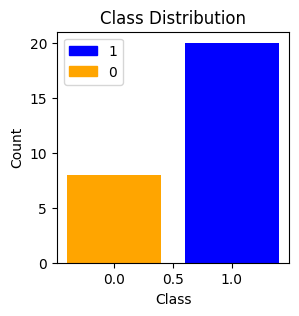

Class Counts:
1    20
0     8
Name: status, dtype: int64


In [10]:


# Assuming your target variable is named ''
#class_counts = data_f['status'].value_counts()
class_counts = data_f['status'].value_counts()

class_names = class_counts.index.tolist()

# Assigning colors to each class
colors = ['blue', 'orange']  # Assign colors for the two classes
class_colors = {class_name: color for class_name, color in zip(class_names, colors)}

# Plotting the class distribution with colors and legend
plt.figure(figsize=(3, 3))
plt.bar(class_names, class_counts, color=[class_colors[class_name] for class_name in class_names])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Adding the legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=class_colors[class_name]) for class_name in class_names]
plt.legend(legend_handles, class_names)

plt.show()

# Print class counts
print('Class Counts:')
print(class_counts)


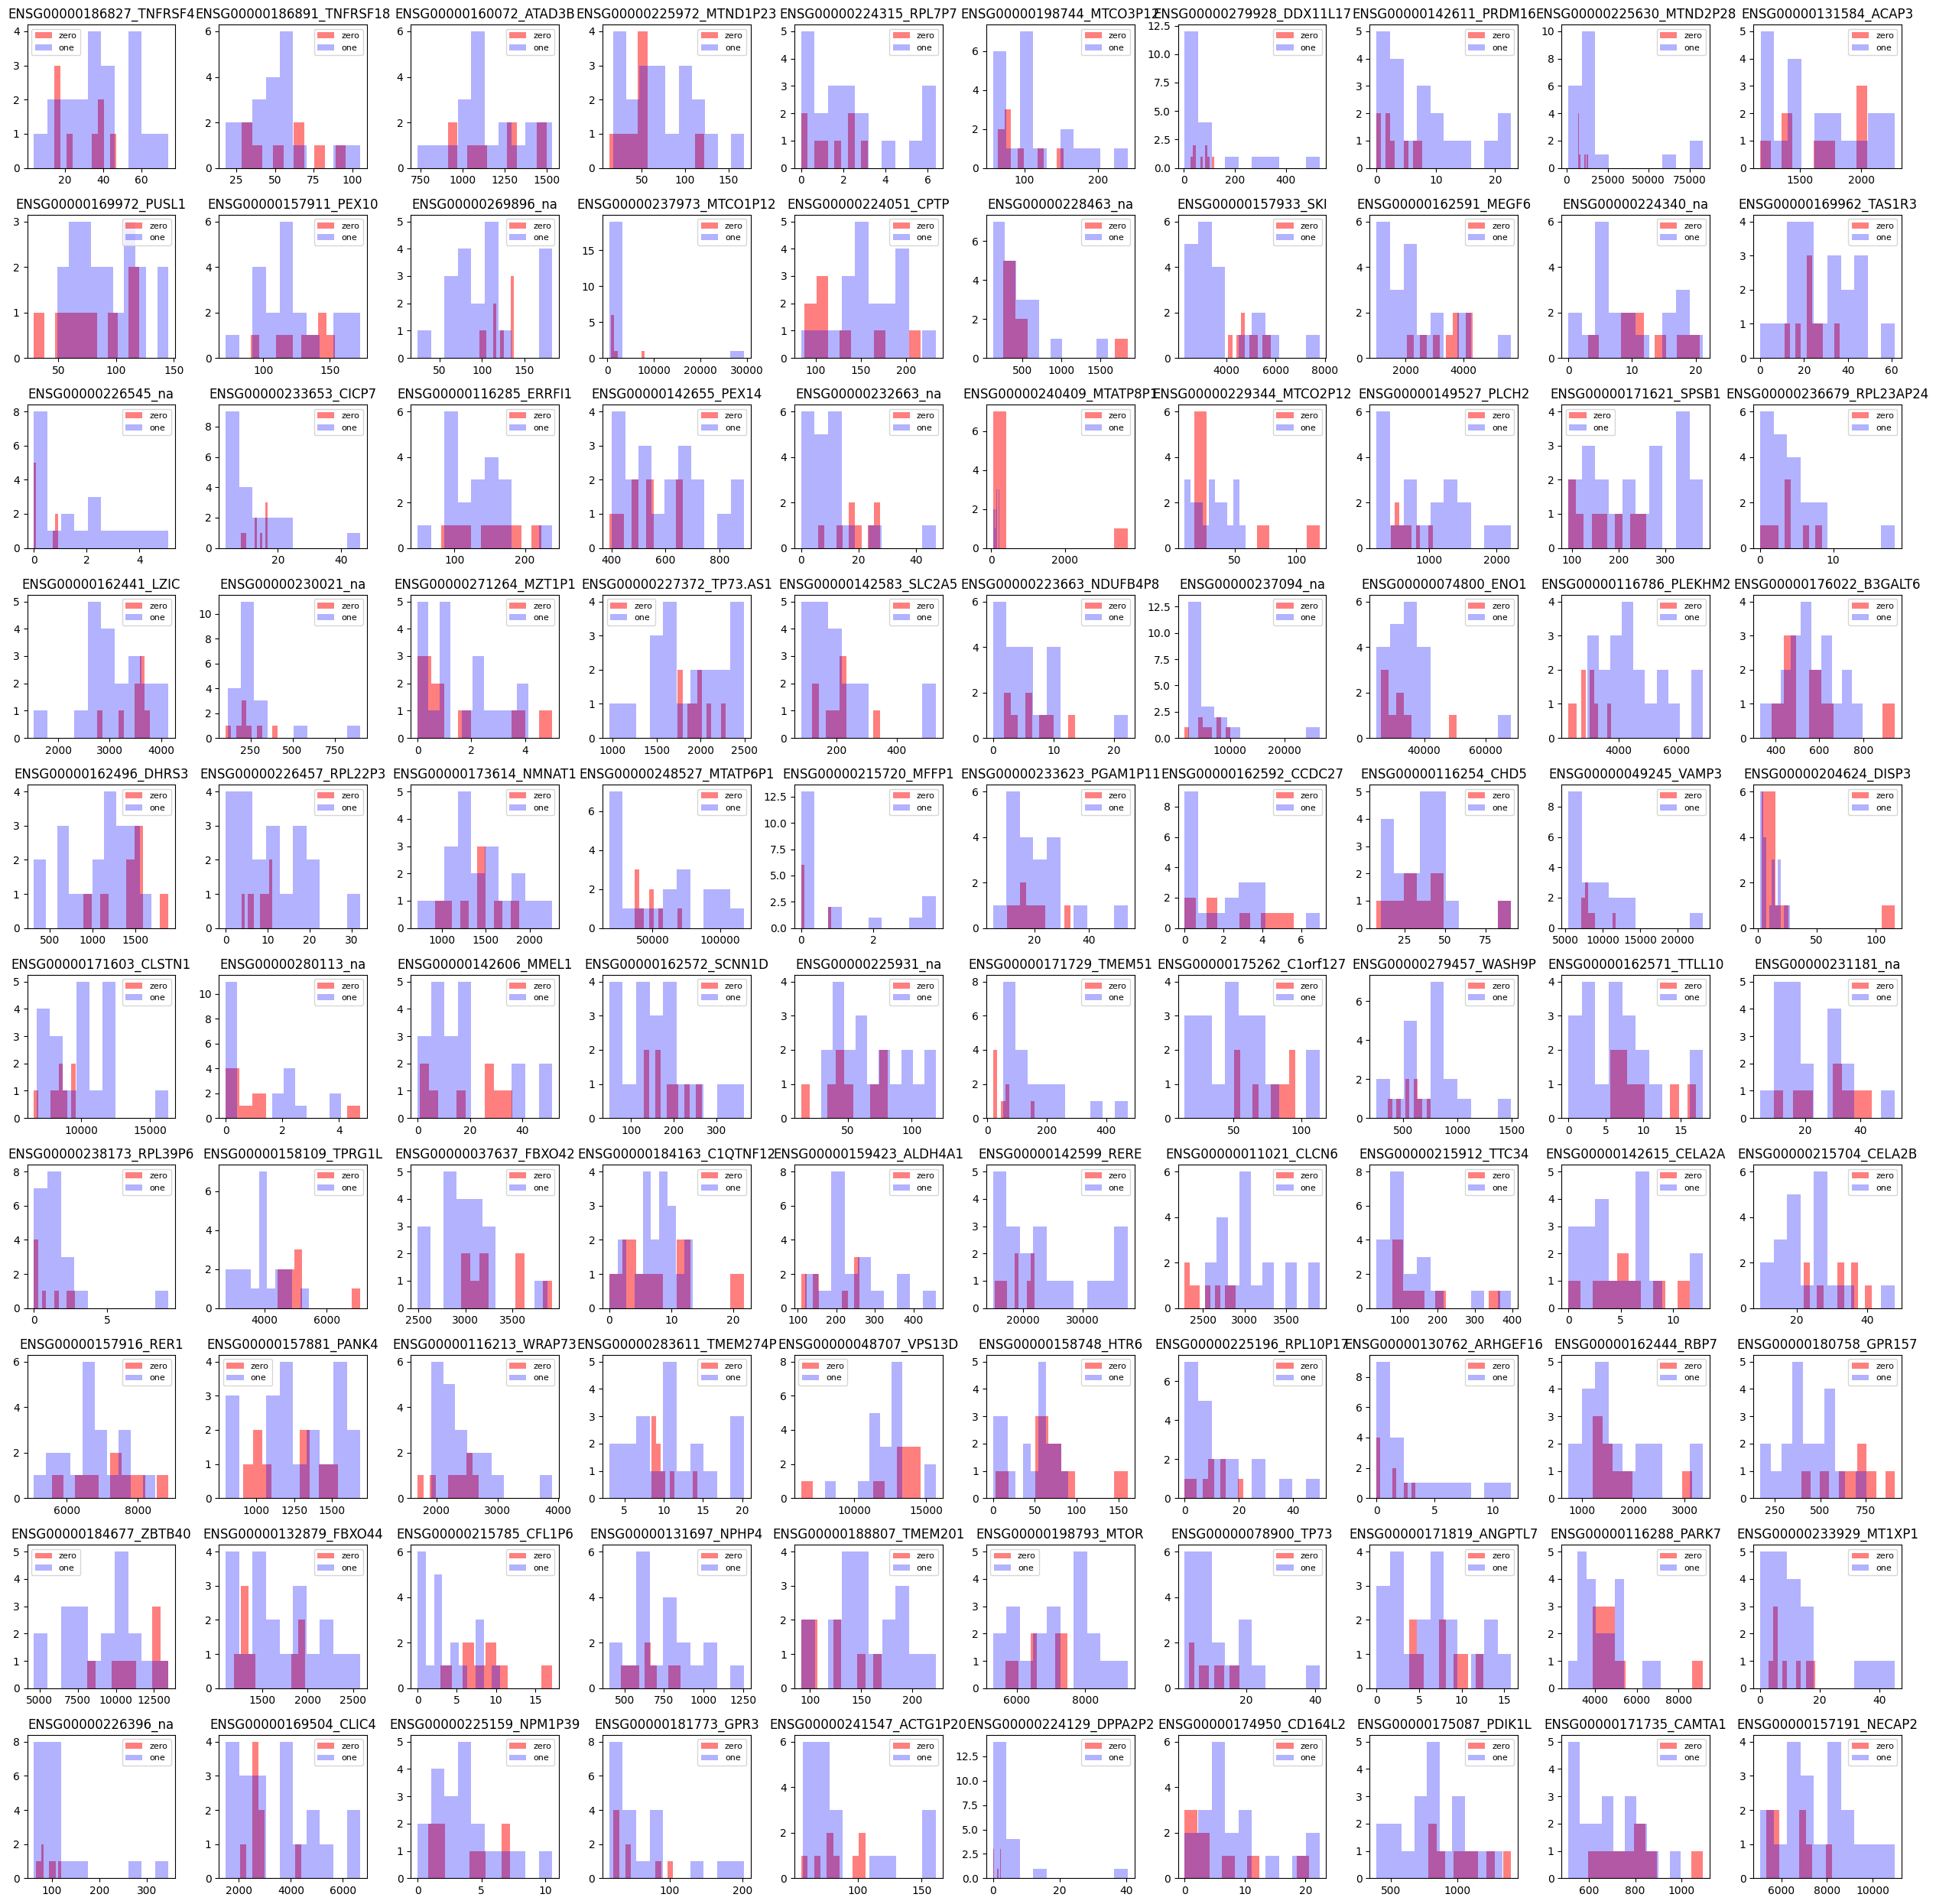

In [11]:
#distribution of each feature for the 'zero' and 'one' classes side by side, allowing you to compare their distributions visually
import numpy as np
import matplotlib.pyplot as plt
_, axes = plt.subplots(10,10, figsize=(25, 25))
zero = data_f[data_f['status'] ==0]
one = data_f[data_f['status'] ==1]

ax = axes.ravel()
# flatten the 2D array
for i in range(100):                   # for each of the 30 features
    bins = 10
    #---plot histogram for each feature---
    ax[i].hist(zero.iloc[:,i], bins=bins, color='r', alpha=.5)
    ax[i].hist(one.iloc[:,i], bins=bins, color='b', alpha=0.3)
    #---set the title---
    ax[i].set_title(data_f.columns[i], fontsize=12)
    #---display the legend---
    ax[i].legend(['zero','one'], loc='best', fontsize=8)

plt.tight_layout()
plt.show()
#If a feature's histograms have a similar shape and overlap, it suggests that the feature may follow a normal distribution
#if the histograms show significant differences between the 'zero' and 'one' classes, either in terms of shape or location, the feature may be biased

In [12]:
#columns_to_replace = ['ENSG00000186891_TNFRSF18', 'ENSG00000160072_ATAD3B', 'ENSG00000225972_MTND1P23', 'ENSG00000198744_MTCO3P12', 'ENSG00000237973_MTCO1P12', 'ENSG00000230585_PHBP12', 'ENSG00000271164_CFAP97P1', 'ENSG00000183317_EPHA10', 'ENSG00000215900_SELENOWP1', 'ENSG00000163879_DNALI1', 'ENSG00000273274_ZBTB8B', 'ENSG00000238199_UBE2V2P3', 'ENSG00000142627_EPHA2', 'ENSG00000270330_na', 'ENSG00000188910_GJB3', 'ENSG00000196581_AJAP1', 'ENSG00000229447_na', 'ENSG00000215899_na', 'ENSG00000233419_IFITM3P7', 'ENSG00000158014_SLC30A2', 'ENSG00000232848_na', 'ENSG00000225196_RPL10P17', 'ENSG00000142615_CELA2A', 'ENSG00000231181_na', 'ENSG00000162571_TTLL10', 'ENSG00000204624_DISP3', 'ENSG00000233623_PGAM1P11', 'ENSG00000223663_NDUFB4P8', 'ENSG00000229344_MTCO2P12']  # List of columns to replace

#for column in columns_to_replace:
    #try:
        #data_f[column] = np.log(data_f[column] + 1)
    #except KeyError:
        #print(f"Column '{column}' does not exist in the dataframe. Skipping...")

# Get all column names except the last column
#columns_to_transform = data_f.columns[:-1]

# Loop through each column to apply the square root transformation
#for column in columns_to_transform:
  #data_f[column] = np.log(data_f[column] + 1)


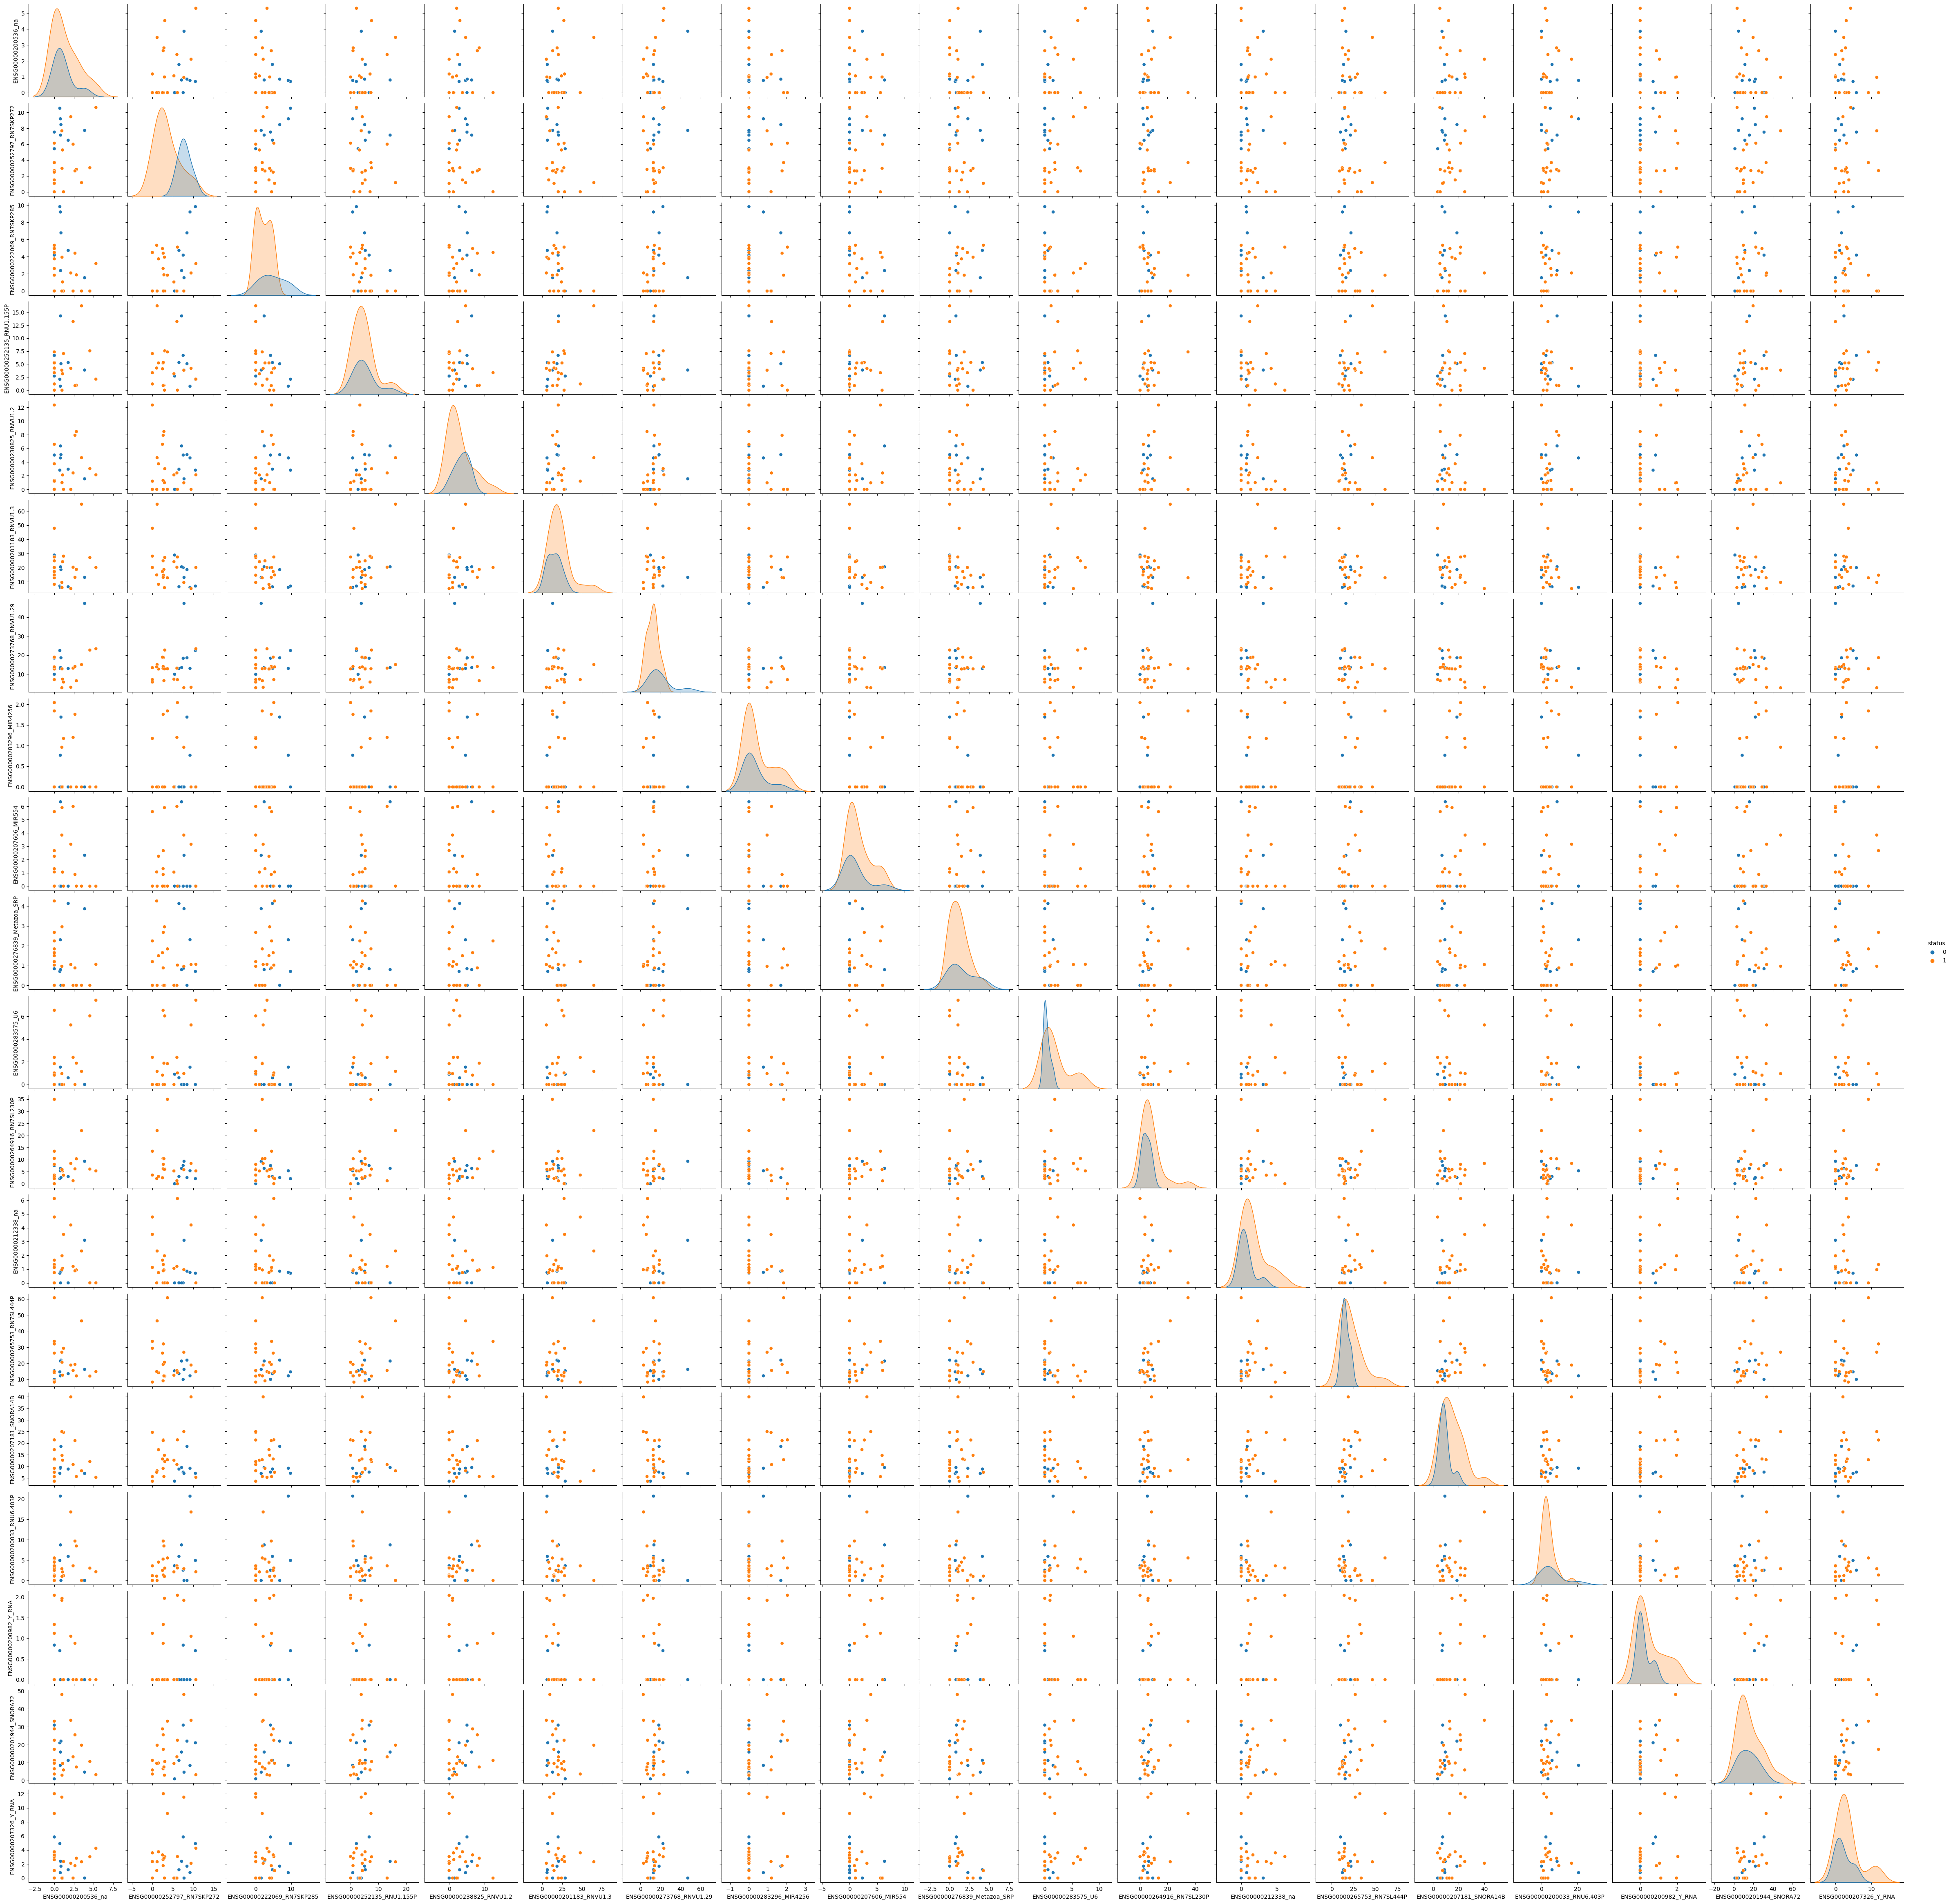

In [13]:
import seaborn as sns
#import pandas as pd

# Assuming your data is in a pandas DataFrame called 'data'
df = pd.DataFrame(data_f)

#sns.pairplot(df.iloc[:, :20], y_vars='status')
sns.pairplot(df.iloc[:, -20:], hue='status')

In [14]:
data_f.shape

(28, 582)

In [15]:
#used in smote: # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#when not using SMOTE
y_train = data_f.iloc[:, -1].values

# Assign the remaining columns to x_train
X_train = data_f.iloc[:, :-1].values

In [16]:
#from sklearn.preprocessing import StandardScaler  # to standardize the features

#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
#scalar = StandardScaler()
#scaled_data = pd.DataFrame(scalar.fit_transform(X_train)) #scaling the data
#scaled_data

from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scalar = MinMaxScaler()

# Fit the scaler to your data to compute the scaling parameters
scalar.fit(X_train)

# Scale your data to the range [0, 1]
scaled_data = scalar.transform(X_train)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,571,572,573,574,575,576,577,578,579,580
0,0.441668,0.685681,0.736019,0.253131,0.184886,0.038325,0.219441,0.103937,0.085499,0.731959,...,0.970651,0.079398,0.084460,0.000000,0.099518,0.145014,0.285372,0.000000,0.218837,0.098253
1,0.613883,0.580011,0.960249,0.275313,0.000000,0.107317,0.161027,0.216030,0.076526,0.794588,...,0.164691,0.000000,0.060188,0.114504,0.121422,0.094262,0.237254,0.343513,0.427180,0.408432
2,0.252004,0.354319,0.505226,0.273857,0.119977,0.070812,0.162033,0.337238,0.073194,0.456743,...,0.539898,0.206093,0.153464,0.125124,0.074311,0.154346,1.000000,0.000000,0.159661,0.063759
3,0.481027,0.549128,0.888926,0.112161,0.000000,0.355588,0.074602,0.000000,0.145247,0.551287,...,0.196295,0.000000,0.215213,0.000000,0.031687,0.108295,0.121193,0.409432,0.636974,0.486808
4,0.175705,0.179970,0.224315,0.163604,0.397368,0.220868,0.184301,0.000000,0.124430,0.000000,...,0.000000,0.000000,0.072611,0.138138,0.260322,0.413519,0.000000,0.000000,0.447512,0.140781


      0     1     2     3     4     5     6     7     8     9     10    11  \
0   1.00  0.48  0.37  0.36  0.03  0.24  0.42  0.37  0.57  0.41  0.39  0.35   
1   0.48  1.00  0.51 -0.07 -0.03 -0.23 -0.10 -0.32 -0.02  0.37 -0.15  0.22   
2   0.37  0.51  1.00 -0.23 -0.02 -0.16 -0.35 -0.25 -0.18  0.70  0.16  0.42   
3   0.36 -0.07 -0.23  1.00  0.06  0.68  0.29  0.56  0.20 -0.16  0.40  0.05   
4   0.03 -0.03 -0.02  0.06  1.00  0.07 -0.24 -0.17 -0.04  0.08  0.07  0.04   
5   0.24 -0.23 -0.16  0.68  0.07  1.00  0.22  0.47  0.09  0.10  0.46 -0.02   
6   0.42 -0.10 -0.35  0.29 -0.24  0.22  1.00  0.48  0.55  0.01  0.13 -0.03   
7   0.37 -0.32 -0.25  0.56 -0.17  0.47  0.48  1.00  0.32 -0.05  0.30 -0.10   
8   0.57 -0.02 -0.18  0.20 -0.04  0.09  0.55  0.32  1.00 -0.06  0.35  0.15   
9   0.41  0.37  0.70 -0.16  0.08  0.10  0.01 -0.05 -0.06  1.00  0.41  0.49   
10  0.39 -0.15  0.16  0.40  0.07  0.46  0.13  0.30  0.35  0.41  1.00  0.41   
11  0.35  0.22  0.42  0.05  0.04 -0.02 -0.03 -0.10  0.15  0.49  

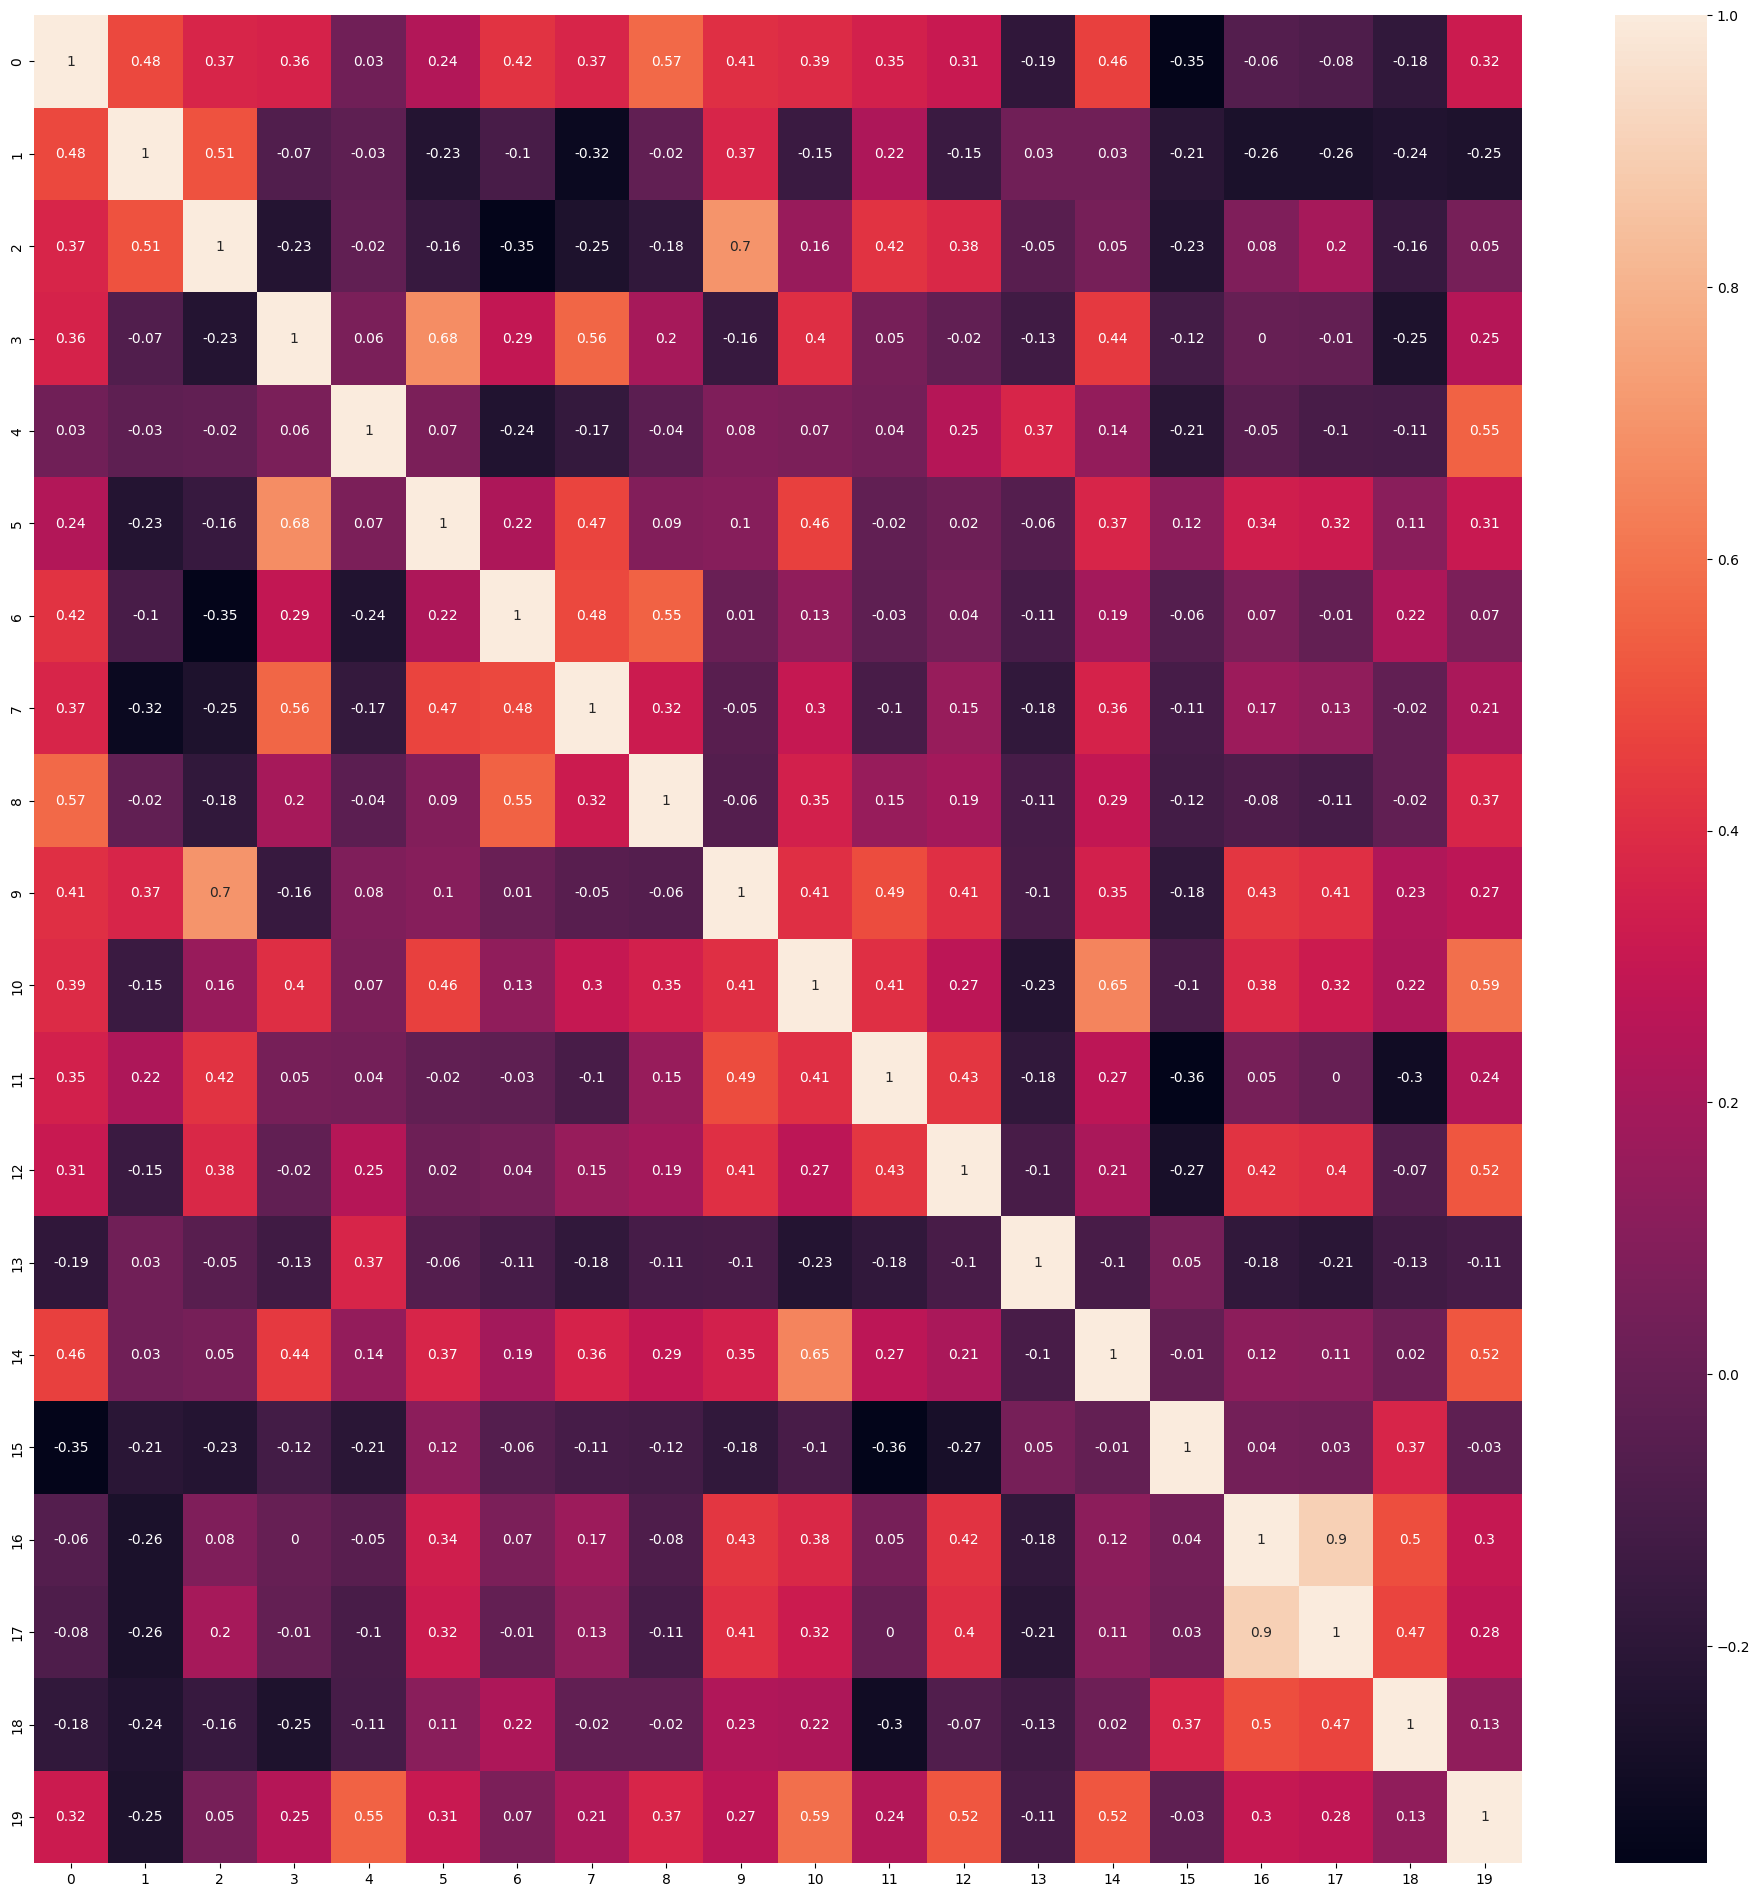

In [17]:
corr_mat = scaled_data.iloc[:,0:20].corr(method = 'pearson', min_periods = 1 ).round(2)
fig = plt.figure(figsize=(24,24))
print(corr_mat)
sns.heatmap(corr_mat, annot=True)
plt.show()
fig.savefig("/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/heatmap.png",dpi=600)
#print(corr_mat)

In [18]:
#models performance before data augmentation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#not using smote, uncomment the line
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(X_true_train,y_true_train)
y_true_pred=clf_true.predict(X_true_test)
print("Base Accuracy:",metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:",metrics.classification_report(y_true_test, y_true_pred))

Base Accuracy: 0.8333333333333334
Base classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.svm import SVC


clf_true = SVC(C=0.8, kernel='sigmoid')  # Use SVM classifier
clf_true.fit(X_true_train,y_true_train)
y_true_pred = clf_true.predict(X_true_test)

print("Base Accuracy:", metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:", metrics.classification_report(y_true_test, y_true_pred))

Base Accuracy: 0.8333333333333334
Base classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.neural_network import MLPClassifier


clf_true = MLPClassifier()  # Use MLP classifier
clf_true.fit(X_true_train,y_true_train)
y_pred = clf_true.predict(X_true_test)

print("Base Accuracy:", metrics.accuracy_score(y_true_test, y_pred))
print("Base classification report:", metrics.classification_report(y_true_test, y_pred))


Base Accuracy: 1.0
Base classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA  # to apply PCA

#Applying PCA
#Taking no. of Principal Components as 3
components = [10]#[1,10,20,30,40,60,80]
for component in components:
  pca = PCA(n_components = component)
  pca.fit(scaled_data)
  data_pca = pca.transform(scaled_data)
  columns = ["PC"+str(item) for item in range(1,component+1)]
  data_pca = pd.DataFrame(data_pca,columns=columns)
  #data_pca.head()

  X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(data_pca, y_train, test_size=0.20, random_state=42)

  clf_true = RandomForestClassifier(n_estimators=1000)
  clf_true.fit(X_true_train,y_true_train)
  y_true_pred=clf_true.predict(X_true_test)
  '''
  from sklearn.svm import SVC


  clf_true = SVC(C=0.8, kernel='sigmoid')  # Use SVM classifier 'poly', 'rbf', 'linear', 'precomputed', 'sigmoid'
  clf_true.fit(X_true_train, y_true_train)
  y_true_pred = clf_true.predict(X_true_test)

  '''
  print("Base Accuracy:", metrics.accuracy_score(y_true_test, y_true_pred))
  print("Base classification report:", metrics.classification_report(y_true_test, y_true_pred))

  print("Base Accuracy_{} :".format(component),metrics.accuracy_score(y_true_test, y_true_pred))
  print("Base classification report {} :".format(component),metrics.classification_report(y_true_test, y_true_pred))



Base Accuracy: 1.0
Base classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Base Accuracy_10 : 1.0
Base classification report 10 :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [22]:
data_pca2 = data_pca.copy()
data_pca2["status"]= y_train
data_pca2.to_csv("/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/data_pca.csv")

In [23]:
#X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(data_pca, y_train, test_size=0.20, random_state=42)

In [24]:
X_true_train.shape

(22, 10)

In [25]:
data_pca2.shape

(28, 11)

In [26]:
# Apply standard scaling
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#X_true_train.shape

In [27]:
# # Define the generator network
# #def build_generator():
#     #noise_input = Input(shape=(10,))
#     #label_input = Input(shape=(1,))  # Only 1 class for filtered data
#     #inputs = Concatenate()([noise_input, label_input])
#     #model = Dense(1024, input_dim=11)(inputs)
#     #model = LeakyReLU(alpha=0.2)(model)
#     #model = Dense(1024)(model)
#     #model = LeakyReLU(alpha=0.2)(model)
#     #gen_data = Dense(X_true_train.shape[1], activation='linear')(model)  # lets try 'relu'
#     #return Model([noise_input, label_input], gen_data)

# from tensorflow.keras.layers import Dropout

# def build_generator():
#     noise_input = Input(shape=(10,))
#     label_input = Input(shape=(1,))  # Only 1 class for filtered data
#     inputs = Concatenate()([noise_input, label_input])
#     model = Dense(1024, input_dim=11)(inputs)
#     model = LeakyReLU(alpha=0.2)(model)
#     # model = Dropout(0.3)(model)  # Add dropout after the first layer

#     model = Dense(1024)(model)
#     model = LeakyReLU(alpha=0.2)(model)

#     # model = Dropout(0.3)(model)  # Add dropout after the second layer
#    # model = Dense(1024)(model)
#     #model = LeakyReLU(alpha=0.2)(model)

#     # model = Dropout(0.3)(model)  # Add dropout after the second layer
#     gen_data = Dense(X_true_train.shape[1], activation='linear')(model)
#     return Model([noise_input, label_input], gen_data)

# # Define the discriminator network
# def build_discriminator():
#     data_input = Input(shape=(X_true_train.shape[1],))
#     label_input = Input(shape=(1,))  # Only 1 class for filtered data
#     inputs = Concatenate()([data_input, label_input])
#     model = Dense(1024, input_dim=X_true_train.shape[1] + 1)(inputs)
#     model = LeakyReLU(alpha=0.2)(model)
#     #model = Dense(1024)(model)
#     #model = LeakyReLU(alpha=0.2)(model)
#     model = Dense(1024)(model)
#     model = LeakyReLU(alpha=0.2)(model)
#     validity = Dense(1, activation='sigmoid')(model)
#     return Model([data_input, label_input], validity)

# # Define the cGAN model
# def build_cgan(generator, discriminator):
#     noise_input = Input(shape=(10,))
#     label_input = Input(shape=(1,))  # Only 1 class for filtered data
#     gen_data = generator([noise_input, label_input])
#     cgan_output = discriminator([gen_data, label_input])
#     return Model([noise_input, label_input], cgan_output)

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the generator network
def build_generator():
    noise_input = Input(shape=(10,))
    label_input = Input(shape=(1,))  # Only 1 class for filtered data
    inputs = Concatenate()([noise_input, label_input])
    model = Dense(1024, input_dim=11)(inputs)
    model = LeakyReLU(alpha=0.2)(model)
    model = Dense(1024)(model)
    model = LeakyReLU(alpha=0.2)(model)
    gen_data = Dense(X_true_train.shape[1], activation='linear')(model)
    return Model([noise_input, label_input], gen_data)

# Define the discriminator network
def build_discriminator():
    data_input = Input(shape=(X_true_train.shape[1],))
    label_input = Input(shape=(1,))  # Only 1 class for filtered data
    inputs = Concatenate()([data_input, label_input])
    model = Dense(1024, input_dim=X_true_train.shape[1] + 1)(inputs)
    model = LeakyReLU(alpha=0.2)(model)
    model = Dense(1024)(model)
    model = LeakyReLU(alpha=0.2)(model)
    validity = Dense(1, activation='linear')(model)  # Linear activation for WGAN-GP
    return Model([data_input, label_input], validity)

# Define the cWGAN-GP model
def build_cwgan(generator, discriminator):
    noise_input = Input(shape=(10,))
    label_input = Input(shape=(1,))  # Only 1 class for filtered data
    gen_data = generator([noise_input, label_input])
    cgan_output = discriminator([gen_data, label_input])
    return Model([noise_input, label_input], cgan_output)

# Wasserstein loss for cWGAN-GP
def wasserstein_loss(y_true, y_pred):
    return -tf.reduce_mean(y_true * y_pred)

# Gradient Penalty loss for cWGAN-GP
def gradient_penalty_loss(y_true, y_pred, averaged_samples, penalty_weight=10):
    gradients = tf.gradients(y_pred, averaged_samples)[0]
    gradients_sqr = tf.square(gradients)
    gradient_penalty = tf.reduce_mean(gradients_sqr)
    return penalty_weight * gradient_penalty

# Define the training loop for cWGAN-GP
def train_cwgan(generator, discriminator, cgan, x_train, y_train, epochs=8000, batch_size=64):
    d_history = []
    g_history = []

    for epoch in range(epochs):
        for _ in range(5):  # Train the discriminator more times than the generator
            # Select a random batch of real data
            idx = np.random.randint(0, x_train.shape[0], batch_size)
            real_data = x_train.iloc[idx]
            labels = pd.DataFrame(y_train).iloc[idx]

            # Generate a batch of noise
            noise = np.random.normal(0, 1, (batch_size, 10))

            # Generate a batch of synthetic data with corresponding labels
            gen_data = generator.predict([noise, labels])

            # Compute the averaged samples for the gradient penalty
            epsilon = np.random.uniform(0, 1, (batch_size, 1))
            averaged_samples = epsilon * real_data + (1 - epsilon) * gen_data

            # Train the discriminator with gradient penalty
            d_loss_real = discriminator.train_on_batch([real_data, labels], -np.ones((batch_size, 1)))
            d_loss_fake = discriminator.train_on_batch([gen_data, labels], np.ones((batch_size, 1)))
            d_loss_gp = discriminator.train_on_batch([averaged_samples, labels], np.zeros((batch_size, 1)))
            d_loss = 0.5 * np.add(d_loss_real, 0.5 * np.add(d_loss_fake, d_loss_gp))

        # Train the generator (via the cWGAN-GP model)
        noise = np.random.normal(0, 1, (batch_size, 10))
        labels = np.random.randint(0, 2, (batch_size, 1))
        g_loss = cgan.train_on_batch([noise, labels], -np.ones((batch_size, 1)))

        # Print the progress
        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Discriminator Loss: {d_loss} | Generator Loss: {g_loss}")

        d_history.append(d_loss)
        g_history.append(g_loss)

    plot_history(d_history, g_history)

    generator.save('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/trained_generated_model_55.h5')

# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
    # plot loss
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='d')
    plt.plot(g_hist, label='gen')
    plt.show()
    plt.close()

# Generate synthetic data using the cGAN model
def generate_data(generator, num_samples, label):
    noise = np.random.normal(0, 1, (num_samples, 10))
    #noise = noise * std.to_numpy() + mean.to_numpy()
    labels = np.ones((num_samples, 1)) * label
    gen_data = generator.predict([noise, labels])
    gen_data_with_labels = np.concatenate((gen_data, labels), axis=1)
    return gen_data_with_labels


# Save generated data to a CSV file
def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

# The rest of your code remains the same

In [29]:
# # Create a line plot of loss for the GAN and save it to a file
# def plot_history_(d_hist, g_hist, filename):
#     plt.plot(d_hist, label='Discriminator')
#     plt.plot(g_hist, label='Generator')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.savefig(filename)
#     plt.close()

# # create a line plot of loss for the gan and save to file
# def plot_history(d_hist, g_hist):
#     # plot loss
#     plt.subplot(1, 1, 1)
#     plt.plot(d_hist, label='d')
#     plt.plot(g_hist, label='gen')
#     plt.show()
#     plt.close()

# # Define the training loop
# def train_cgan(generator, discriminator, cgan, x_train, y_train, epochs=15000, batch_size=64):
#     d_history = []
#     g_history = []

#     for epoch in range(epochs):
#         # Select a random batch of real data
#         idx = np.random.randint(0, x_train.shape[0], batch_size)
#         real_data = x_train.iloc[idx]
#         labels = pd.DataFrame(y_train).iloc[idx]

#         # Generate a batch of noise
#         noise = np.random.normal(0, 1, (batch_size, 10))

#         # Generate a batch of synthetic data with corresponding labels
#         gen_data = generator.predict([noise, labels])

#         # Train the discriminator
#         d_loss_real = discriminator.train_on_batch([real_data, labels], np.ones((batch_size, 1)))
#         d_loss_fake = discriminator.train_on_batch([gen_data, labels], np.zeros((batch_size, 1)))
#         d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#         # Train the generator (via the cGAN model)
#         g_loss = cgan.train_on_batch([noise, labels], np.ones((batch_size, 1)))

#         # Print the progress
#         if epoch % 1000 == 0:
#             print(f"Epoch: {epoch} | Discriminator Loss: {d_loss} | Generator Loss: {g_loss}")

#         d_history.append(d_loss)
#         g_history.append(g_loss)

#     plot_history(d_history, g_history)

#     generator.save('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/trained_generated_model_55.h5')


In [30]:
# # Generate synthetic data using the cGAN model
# def generate_data(generator, num_samples, label):
#     noise = np.random.normal(0, 1, (num_samples, 10))
#     #noise = noise * std.to_numpy() + mean.to_numpy()
#     labels = np.ones((num_samples, 1)) * label
#     gen_data = generator.predict([noise, labels])
#     gen_data_with_labels = np.concatenate((gen_data, labels), axis=1)
#     return gen_data_with_labels


# # Save generated data to a CSV file
# def save_to_csv(data, filename):
#     df = pd.DataFrame(data)
#     df.to_csv(filename, index=False)


In [31]:
# Example usage

generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator model with WGAN-GP loss
discriminator.compile(loss=wasserstein_loss, optimizer=Adam(0.00001))
# Compile the cWGAN-GP model with WGAN-GP loss
cwgan = build_cwgan(generator, discriminator)
cwgan.compile(loss=wasserstein_loss, optimizer=Adam(0.00001))

# Mean and Std normalization if needed
# mean = np.mean(X_true_train)
# std = np.std(X_true_train)
# X_true_train = (X_true_train - mean) / std


In [32]:
# # Example usage

# generator = build_generator()
# discriminator = build_discriminator()



# # Compile the discriminator model
# discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.00001), metrics=['accuracy'])

# # Compile the cGAN model
# cgan = build_cgan(generator, discriminator)
# cgan.compile(loss='binary_crossentropy', optimizer=Adam(0.00001))

# #mean = np.mean(X_true_train)
# #std = np.std(X_true_train)


In [33]:
# Reverse the normalization process to bring generated data back to the original scale
def rescale_data(data, scaler):
    data_shape = data.shape
    reshaped_data = data[:, :-1].reshape(-1, data_shape[-1] - 1)  # Reshape the data for inverse transformation, excluding the label column
    rescaled_data = scaler.inverse_transform(reshaped_data)
    rescaled_data_with_labels = np.concatenate((rescaled_data, data[:, -1].reshape(-1, 1)), axis=1)  # Concatenate the label column back to the rescaled data
    return rescaled_data_with_labels



In [34]:
#X_true_train.head()
X_true_train = pd.DataFrame(X_true_train)
X_true_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
17,-2.113851,-1.712649,0.919919,-1.033586,1.108729,0.141497,-1.647200,0.496980,-1.359184,0.459861
22,2.622902,-1.134626,-1.434714,2.900862,1.091222,-1.858776,-0.797750,-0.279038,-0.633722,1.255520
11,-1.277498,3.572279,2.079364,-1.136311,-0.967415,-0.159189,0.690132,0.693596,-2.400867,0.565172
13,2.126702,-2.046761,2.758522,-3.370278,0.534016,-1.039336,-1.088715,0.178890,-1.837150,-0.297788
15,0.546893,3.107564,2.938205,-0.819048,-0.637380,-1.744413,2.510786,-0.364666,0.429031,-0.376858


In [35]:
y_true_train

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [36]:
# train_cgan(generator, discriminator, cgan, X_true_train, y_true_train)

In [ ]:
# Training cWGAN-GP
train_cwgan(generator, discriminator, cwgan, X_true_train, y_train, epochs=8000, batch_size=64)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 13ms/step
Epoch: 3000 | Discriminator Loss: -123.38916015625 | Generator Loss: -1581.0777587890625
2/2 [==============================] - 0s 14ms/step


In [ ]:
from keras.models import load_model
generator = load_model('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/trained_generated_model_55.h5')

In [ ]:

# # Generating synthetic data
# num_samples = 1000  # Number of synthetic samples to generate
# label = 1  # Label for the synthetic data
# generated_data = generate_data(generator, num_samples, label)

# # Save generated data to a CSV file
# save_to_csv(generated_data, "/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/generated_data_cwgan-gp.csv")

In [ ]:
#mean = np.mean(X_true_train)
#std = np.std(X_true_train)
num_samples = 1000
class_label = 1
# Generate synthetic data using the cGAN model for class 1 "severe"
synthetic_data_normalized = generate_data(generator, num_samples, class_label)

#synthetic_data_rescaled = rescale_data(synthetic_data_normalized, scaler)

# Save rescaled data to a CSV file
#save_to_csv(synthetic_data_rescaled, '/content/drive/MyDrive/yvette/generated_rescaled_data_class1.csv')

# Save generated data to a CSV file
save_to_csv(synthetic_data_normalized, '/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/generated_data__class1.csv')

In [ ]:
#generate data for class label 0 "non-severe"
num_samples = 1000
class_label = 0

# Generate synthetic data using the cGAN model
synthetic_data_normalized = generate_data(generator, num_samples, class_label)

#synthetic_data_rescaled = rescale_data(synthetic_data_normalized, scaler)

# Save rescaled data to a CSV file
#save_to_csv(synthetic_data_rescaled, '/content/drive/MyDrive/yvette/generated_rescaled_data_class0.csv')

# Save generated data to a CSV file
save_to_csv(synthetic_data_normalized, '/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/generated_data__class0.csv')

In [ ]:
#merge the two synthetic datasets

class1 = pd.read_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/generated_data__class1.csv')

# Load the fake data
class0 = pd.read_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/generated_data__class0.csv')

# Remove the default column names from the fake dataset
#class1_no_default_cols = class1[1:]
#class0_no_default_cols = class0[1:]

class1.head()

In [ ]:
#merge the two dataset into a single one
# Append the DataFrames vertically
combined_df = pd.concat([class1, class0], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/generated_data_combined_classes.csv', index=False)

# Replace the column names in the fake merged dataset with the column names from the real dataset
combined_df.columns = data_pca2.columns

combined_df.head()

In [ ]:
combined_df = pd.read_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/generated_data_combined_classes.csv')

In [ ]:
combined_df.shape

In [ ]:
data_gen = combined_df.iloc[:, :-1].values
data_gen

In [ ]:
data_gen = pd.DataFrame(data_gen)
data_gen.head()

In [ ]:
df_orig = pca.inverse_transform(data_gen)
df_or = pd.DataFrame(df_orig)
df_or.head()
df_o =scalar.inverse_transform(df_or)
df_back =pd.DataFrame(df_o)
df_back["status"] = combined_df.iloc[:, -1]
df_back.to_csv("/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/data_gen.csv",index=False)
df_back.head()

In [ ]:
!pip install table_evaluator

In [ ]:
data_f.head()
data_f.to_csv("/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/data_f.csv",index=None)

In [ ]:
from table_evaluator import *

#real = pd.read_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/oversampled_data.csv')
real = pd.read_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/data_f.csv')


# Load the fake data
fake = pd.read_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/data_gen.csv')

fake.columns = real.columns

fake.head()



In [ ]:
fake.tail()

In [ ]:
real.head()

In [ ]:
real.shape

In [ ]:
fake.shape

In [ ]:
# Specify the subset of variables you want to consider
selected_vars = fake.columns[0:25]  # Replace with your desired variable names

# Subset the real and fake data using the selected variables
real_subset = real[selected_vars]
fake_subset = fake[selected_vars]


# Create the TableEvaluator object
table_evaluator = TableEvaluator(real_subset, fake_subset)
table_evaluator.visual_evaluation()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `real_subset` and `fake_subset` are your dataframes with selected variables
correlation_matrix_real = real_subset.corr()
correlation_matrix_fake = fake_subset.corr()

# Calculate the difference between the two correlation matrices
correlation_difference = correlation_matrix_real - correlation_matrix_fake

# Plot correlation matrix for real data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_real, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Real Data')
plt.show()

# Plot correlation matrix for fake data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_fake, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Fake Data')
plt.show()

# Plot difference correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_difference, annot=True, cmap='coolwarm')
plt.title('Difference Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming `real_subset` and `fake_subset` are your dataframes with selected variables

# Concatenate real and fake dataframes
combined_data = pd.concat([real, fake], ignore_index=True)
x_scaled = StandardScaler().fit_transform(combined_data)

# Perform PCA
pca = PCA(n_components=2)  # Set the number of components you want to keep
pca_result = pca.fit_transform(x_scaled)

# Create separate arrays for real and fake data points in the reduced dimension
real_pca = pca_result[:len(real_subset)]
fake_pca = pca_result[len(real_subset):]

explained_variances = pca.explained_variance_ratio_

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real Data')
plt.scatter(fake_pca[:, 0], fake_pca[:, 1], label='Fake Data')
plt.title('PCA - Real Data (Explained Variances: {:.2f}, {:.2f})'.format(*explained_variances))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Assuming `real_subset` and `fake_subset` are your dataframes with selected variables

# # Concatenate real and fake dataframes
# combined_data = pd.concat([real_subset, fake_subset], ignore_index=True)

# # Separate the labels for real and fake data
# real_labels = np.ones(len(real_subset))  # Assuming 1 represents real data
# fake_labels = np.zeros(len(fake_subset))  # Assuming 0 represents fake data

# # Create an array of labels indicating whether the data point is real or fake
# labels = np.concatenate([real_labels, fake_labels])

# # Scale the combined data
# x_scaled = StandardScaler().fit_transform(combined_data)

# # Perform PCA
# pca = PCA(n_components=2)  # Set the number of components you want to keep
# pca_result = pca.fit_transform(x_scaled)

# # Separate the PCA results for real and fake data points in the reduced dimension
# real_pca = pca_result[labels == 1]
# fake_pca = pca_result[labels == 0]


# # Calculate the explained variances for each principal component
# explained_variances = pca.explained_variance_ratio_

# # Plot PCA results for real data
# plt.figure(figsize=(8, 6))
# plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real Data', c='b')
# plt.title('PCA - Real Data (Explained Variances: {:.2f}, {:.2f})'.format(*explained_variances))
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()

# # Plot PCA results for fake data
# plt.figure(figsize=(8, 6))
# plt.scatter(fake_pca[:, 0], fake_pca[:, 1], label='Fake Data', c='r')
# plt.title('PCA - Fake Data (Explained Variances: {:.2f}, {:.2f})'.format(*explained_variances))
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()


In [ ]:
fake["status"].value_counts()

In [ ]:
fake.shape

In [ ]:
combined_data.shape

In [ ]:
y_train = combined_data.iloc[:, -1].values

# Assign the remaining columns to x_train
x_train = combined_data.iloc[:, :-1].values

In [ ]:
#models performance after data augmentstion
#fake data
#RF
from sklearn import metrics



X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(X_true_train,y_true_train)
y_true_pred=clf_true.predict(X_true_test)
print("Base Accuracy:",metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:",metrics.classification_report(y_true_test, y_true_pred))


In [ ]:
from sklearn.svm import SVC


clf_true = SVC(C=0.8, kernel='sigmoid')  # Use SVM classifier sigmoid
clf_true.fit(X_true_train, y_true_train)
y_true_pred = clf_true.predict(X_true_test)

print("Base Accuracy:", metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:", metrics.classification_report(y_true_test, y_true_pred))

In [ ]:
from sklearn.neural_network import MLPClassifier


clf_true = MLPClassifier()  # Use MLP classifier
clf_true.fit(X_true_train, y_true_train)
y_true_pred = clf_true.predict(X_true_test)

print("Base Accuracy:", metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:", metrics.classification_report(y_true_test, y_true_pred))

In [ ]:
combined_data.shape

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot
from numpy.linalg import norm

def compute_cosine_similarity(vector1, vector2):
    return dot(vector1, vector2) / (norm(vector1) * norm(vector2))

# Load feature vectors from CSV files
df1 = real
df2 = fake

# Initialize a list to store the neighbor vectors
neighbor_vectors = []

# Iterate over each vector in df1 as a target vector
for _, target_vector in df1.iterrows():
    # Compute cosine similarity with all vectors in df2
    similarities = []
    for _, row in df2.iterrows():
        cosine_sim = compute_cosine_similarity(target_vector, row)
        similarities.append(cosine_sim)

    # Get indices of N closest neighbors
    n = 5  # Number of closest neighbors to select
    closest_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:n]

    # Add the closest neighbor vectors to the list
    closest_vectors = df2.loc[closest_indices]
    neighbor_vectors.extend(closest_vectors.values)

# Create a new DataFrame for the neighbor vectors
df_neighbors = pd.DataFrame(neighbor_vectors, columns=df2.columns)

# Remove duplicates from df_neighbors
df_neighbors = df_neighbors.drop_duplicates()

# Remove rows with negative values from df_neighbors
#df_neighbors = df_neighbors[(df_neighbors >= 0).all(1)]

# Save the neighbor vectors to a CSV file
df_neighbors.to_csv('/content/drive/MyDrive/my thesis/my_project/Data_aumentation/beta/R1/data/fake_neighbor_vectors.csv', index=False)
df_neighbors.head()


In [ ]:
df_neighbors.shape

In [ ]:
fake=df_neighbors

In [ ]:
# Specify the subset of variables you want to consider
selected_vars = fake.columns[0:25]  # Replace with your desired variable names

# Subset the real and fake data using the selected variables
real_subset = real[selected_vars]
fake_subset = fake[selected_vars]


# Create the TableEvaluator object
table_evaluator = TableEvaluator(real_subset, fake_subset)
table_evaluator.visual_evaluation()

In [ ]:
fake.head()

In [ ]:
real.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming `real_subset` and `fake_subset` are your dataframes with selected variables

# Concatenate real and fake dataframes
combined_data = pd.concat([real, fake], ignore_index=True)
x_scaled = StandardScaler().fit_transform(combined_data)

# Perform PCA
pca = PCA(n_components=2)  # Set the number of components you want to keep
pca_result = pca.fit_transform(x_scaled)

# Create separate arrays for real and fake data points in the reduced dimension
real_pca = pca_result[:len(real_subset)]
fake_pca = pca_result[len(real_subset):]

# Calculate the explained variances for each principal component
explained_variances = pca.explained_variance_ratio_
# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real Data')
plt.scatter(fake_pca[:, 0], fake_pca[:, 1], label='Fake Data')
plt.title('PCA - Real Data (Explained Variances: {:.2f}, {:.2f})'.format(*explained_variances))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
y_train = combined_data.iloc[:, -1].values

# Assign the remaining columns to x_train
x_train = combined_data.iloc[:, :-1].values

In [ ]:
#models performance after data augmentstion
#fake data
#RF
from sklearn import metrics



X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(X_true_train,y_true_train)
y_true_pred=clf_true.predict(X_true_test)
print("Base Accuracy:",metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:",metrics.classification_report(y_true_test, y_true_pred))


In [ ]:
from sklearn.neural_network import MLPClassifier


clf_true = MLPClassifier()  # Use MLP classifier
clf_true.fit(X_true_train, y_true_train)
y_true_pred = clf_true.predict(X_true_test)

print("Base Accuracy:", metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:", metrics.classification_report(y_true_test, y_true_pred))